#### Problem setup

Consider the following ODE system:
$$
\frac{d u_1}{dt} = a u_1 u_3,
\\\frac{d u_2}{dt} = b u_2 u_3,
\\\frac{d u_3}{dt} = c u_1^2 + d u_2^2,
$$
where $a, b, c, d$ are unknown variables, whose exact values are $1, -1, -1, 1$.

We infer them from data generated from two different initial conditions. In this case, the models are chosen to be a multi-head PINN.

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

In [2]:
data = sio.loadmat("./data/ko_data_1.mat")
t1_test = data["t"]
u1_test = data["y"]

t1_train = t1_test[::20]
u1_train = u1_test[::20]
f1_train = np.zeros_like(u1_train)

data = sio.loadmat("./data/ko_data_2.mat")
t2_test = data["t"]
u2_test = data["y"]

t2_train = t2_test[::20]
u2_train = u2_test[::20]
f2_train = np.zeros_like(u2_train)

In [3]:
model = models.Meta2()

In [4]:
loss = model.train(
    t1_train, 
    f1_train, 
    t1_train, 
    u1_train, 
    t2_train, 
    f2_train, 
    t2_train, 
    u2_train, 
    niter=100000,
)

0 5.3970895
1000 1.9922825
2000 0.22397223
3000 0.08670726
4000 0.052784
5000 0.034760296
6000 0.025447743
7000 0.017098237
8000 0.0110484185
9000 0.008678265
10000 0.0055229
11000 0.0031277786
12000 0.003370109
13000 0.002418446
14000 0.0021501486
15000 0.0019357183
16000 0.0017535718
17000 0.0031411247
18000 0.0015607943
19000 0.0013675154
20000 0.0012816251
21000 0.0013909275
22000 0.0011477342
23000 0.0029537254
24000 0.0011214605
25000 0.001190777
26000 0.0010029221
27000 0.0010294542
28000 0.0015239355
29000 0.00131145
30000 0.0011273982
31000 0.0008609482
32000 0.0012476491
33000 0.00083410897
34000 0.0008448595
35000 0.0007932196
36000 0.0007813248
37000 0.00077477895
38000 0.000783249
39000 0.0007434862
40000 0.0007440165
41000 0.00072466565
42000 0.0011463962
43000 0.0007127975
44000 0.0037186001
45000 0.0006877341
46000 0.00070279255
47000 0.0010150935
48000 0.0007682755
49000 0.00085939525
50000 0.002168628
51000 0.00085882744
52000 0.00088020234
53000 0.0015818467
54000 0.

In [5]:
model.restore()
u_pred = model.nn(tf.constant(t1_test, tf.float32)).numpy()
u1_pred, u2_pred = np.split(u_pred, 2, axis=-1)

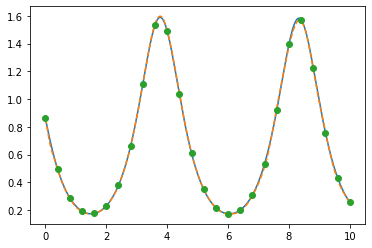

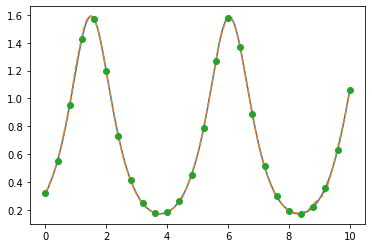

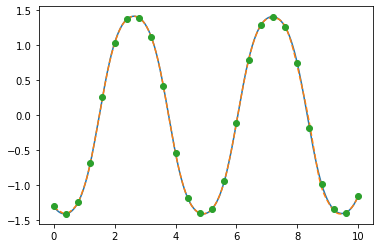

In [6]:
plt.plot(t1_test, u1_test[:, 0:1])
plt.plot(t1_test, u1_pred[:, 0:1], "--")
plt.plot(t1_train, u1_train[:, 0:1], "o")
plt.show()

plt.plot(t1_test, u1_test[:, 1:2])
plt.plot(t1_test, u1_pred[:, 1:2], "--")
plt.plot(t1_train, u1_train[:, 1:2], "o")
plt.show()

plt.plot(t1_test, u1_test[:, 2:3])
plt.plot(t1_test, u1_pred[:, 2:3], "--")
plt.plot(t1_train, u1_train[:, 2:3], "o")
plt.show()

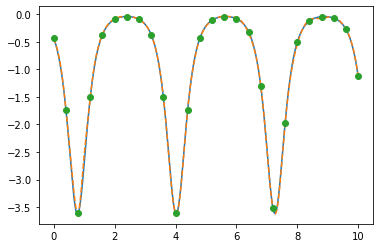

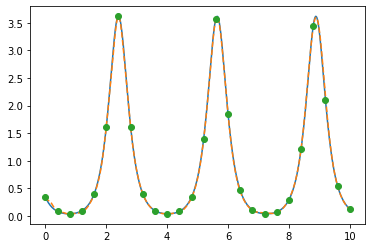

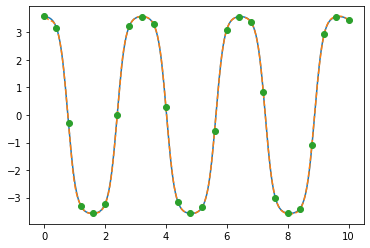

In [7]:
plt.plot(t2_test, u2_test[:, 0:1])
plt.plot(t2_test, u2_pred[:, 0:1], "--")
plt.plot(t2_train, u2_train[:, 0:1], "o")
plt.show()

plt.plot(t2_test, u2_test[:, 1:2])
plt.plot(t2_test, u2_pred[:, 1:2], "--")
plt.plot(t2_train, u2_train[:, 1:2], "o")
plt.show()

plt.plot(t2_test, u2_test[:, 2:3])
plt.plot(t2_test, u2_pred[:, 2:3], "--")
plt.plot(t2_train, u2_train[:, 2:3], "o")
plt.show()

In [8]:
print("a:", model.a.numpy())
print("b:", model.b.numpy())
print("c:", model.c.numpy())
print("d:", model.d.numpy())

a: 1.0105306
b: -1.0072039
c: -1.0027075
d: 1.0025626
